# IMPORTING Needed Packages :

In [151]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score,recall_score,precision_score,mean_squared_error,roc_auc_score
!pip install xgboost
import xgboost as xgb


# EXTRACTING DATA IN CSV FORMAT :

In [2]:
dg=pd.read_excel("Copper_Set.xlsx")

# DATA CLEANSING & FILLING :

In [3]:
dg

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
dg['material_ref']=dg['material_ref'].replace(r'00000', np.nan,regex=True)

In [5]:
dg

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,20200701.0,601.00


In [6]:
df=dg[(dg['status']=='Won')|(dg['status']=='Lost')].reset_index(drop=True)

In [7]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,20200701.0,591.00
150444,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,20200701.0,589.00
150445,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,20200701.0,619.00
150446,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,20200701.0,601.00


In [8]:
df.isnull().sum()

id                   1
item_date            1
quantity tons        0
customer             1
country              4
status               0
item type            0
application          3
thickness            0
width                0
material_ref     83487
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [9]:
df['id'].fillna(df['id'].mode()[0],inplace=True)
df['item_date'].fillna(df['item_date'].mean(),inplace=True)
df['customer'].fillna(df['customer'].mean(),inplace=True)
df['country'].fillna(df['country'].mean(),inplace=True)
df['application'].fillna(df['application'].mean(),inplace=True)
df['thickness'].fillna(df['thickness'].mean(),inplace=True)
df['material_ref'].fillna(df['material_ref'].mode()[0],inplace=True)
df['delivery date'].fillna(df['delivery date'].mean(),inplace=True)
df['selling_price'].fillna(df['selling_price'].mean(),inplace=True)

In [10]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150448 entries, 0 to 150447
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             150448 non-null  object 
 1   item_date      150448 non-null  float64
 2   quantity tons  150448 non-null  object 
 3   customer       150448 non-null  float64
 4   country        150448 non-null  float64
 5   status         150448 non-null  object 
 6   item type      150448 non-null  object 
 7   application    150448 non-null  float64
 8   thickness      150448 non-null  float64
 9   width          150448 non-null  float64
 10  material_ref   150448 non-null  object 
 11  product_ref    150448 non-null  int64  
 12  delivery date  150448 non-null  float64
 13  selling_price  150448 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 16.1+ MB


In [12]:
df['item_date']=pd.to_datetime(df['item_date'])
df['delivery date']=pd.to_datetime(df['delivery date'])
df['customer']=df['customer'].astype(int)
df['country']=df['country'].astype(int)
df['application']=df['application'].astype(int)
df['thickness']=df['thickness'].astype(int)
df['width']=df['width'].astype(int)
df['selling_price']=df['selling_price'].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150448 entries, 0 to 150447
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             150448 non-null  object        
 1   item_date      150448 non-null  datetime64[ns]
 2   quantity tons  150448 non-null  object        
 3   customer       150448 non-null  int32         
 4   country        150448 non-null  int32         
 5   status         150448 non-null  object        
 6   item type      150448 non-null  object        
 7   application    150448 non-null  int32         
 8   thickness      150448 non-null  int32         
 9   width          150448 non-null  int32         
 10  material_ref   150448 non-null  object        
 11  product_ref    150448 non-null  int64         
 12  delivery date  150448 non-null  datetime64[ns]
 13  selling_price  150448 non-null  int32         
dtypes: datetime64[ns](2), int32(6), int64(1), object(5)


In [14]:
q1=df['customer'].quantile(0.25)
q2=df['customer'].quantile(0.5)
q3=df['customer'].quantile(0.75)
IQR = q3-q1
ul=q3+1.5*IQR
ll=q1-1.5*IQR
IQR,ul,ll

(82932.0, 30404216.0, 30072488.0)

In [15]:
df['customer'].describe()

count    1.504480e+05
mean     3.027510e+07
std      9.455052e+06
min      1.245800e+04
25%      3.019689e+07
50%      3.020531e+07
75%      3.027982e+07
max      2.147484e+09
Name: customer, dtype: float64

In [16]:
q1=df['country'].quantile(0.25)
q2=df['country'].quantile(0.5)
q3=df['country'].quantile(0.75)
IQR = q3-q1
ul=q3+1.5*IQR
ll=q1-1.5*IQR
IQR,ul,ll

(52.0, 156.0, -52.0)

In [17]:
df['country'].describe()

count    150448.000000
mean         45.391079
std          24.487868
min          25.000000
25%          26.000000
50%          30.000000
75%          78.000000
max         113.000000
Name: country, dtype: float64

In [18]:
q1=df['application'].quantile(0.25)
q2=df['application'].quantile(0.5)
q3=df['application'].quantile(0.75)
IQR = q3-q1
ul=q3+1.5*IQR
ll=q1-1.5*IQR
IQR,ul,ll

(31.0, 87.5, -36.5)

In [19]:
df['application'].describe()

count    150448.000000
mean         25.195104
std          17.640112
min           2.000000
25%          10.000000
50%          15.000000
75%          41.000000
max          99.000000
Name: application, dtype: float64

In [20]:
q1=df['thickness'].quantile(0.25)
q2=df['thickness'].quantile(0.5)
q3=df['thickness'].quantile(0.75)
IQR = q3-q1
ul=q3+1.5*IQR
ll=q1-1.5*IQR
IQR,ul,ll

(3.0, 7.5, -4.5)

In [21]:
df['thickness'].describe()

count    150448.000000
mean          2.265853
std           7.164469
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max        2500.000000
Name: thickness, dtype: float64

In [22]:
q1=df['width'].quantile(0.25)
q2=df['width'].quantile(0.5)
q3=df['width'].quantile(0.75)
IQR = q3-q1
ul=q3+1.5*IQR
ll=q1-1.5*IQR
IQR,ul,ll

(324.0, 1986.0, 690.0)

In [23]:
df['width'].describe()

count    150448.000000
mean       1297.839446
std         266.159386
min           1.000000
25%        1176.000000
50%        1250.000000
75%        1500.000000
max        2990.000000
Name: width, dtype: float64

In [24]:
q1=df['product_ref'].quantile(0.25)
q2=df['product_ref'].quantile(0.5)
q3=df['product_ref'].quantile(0.75)
IQR = q3-q1
ul=q3+1.5*IQR
ll=q1-1.5*IQR
IQR,ul,ll

(1331448760.0, 3329250277.0, -1996544763.0)

In [25]:
df['product_ref'].describe()

count    1.504480e+05
mean     4.748400e+08
std      7.172630e+08
min      6.117280e+05
25%      6.283770e+05
50%      6.406650e+05
75%      1.332077e+09
max      1.722208e+09
Name: product_ref, dtype: float64

In [26]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,1970-01-01 00:00:00.020210401,54.151139,30156308,28,Won,W,10,2,1500,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,1970-01-01 00:00:00.020210401,768.024839,30202938,25,Won,W,41,0,1210,DX51D+Z,1668701718,1970-01-01 00:00:00.020210401,1047
2,E140FF1B-2407-4C02-A0DD-780A093B1158,1970-01-01 00:00:00.020210401,386.127949,30153963,30,Won,WI,28,0,952,S0380700,628377,1970-01-01 00:00:00.020210101,644
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,1970-01-01 00:00:00.020210401,202.411065,30349574,32,Won,S,59,2,1317,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01 00:00:00.020210101,768
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,1970-01-01 00:00:00.020210401,785.526262,30211560,28,Won,W,10,4,2000,2_S275JR+AR-CL1,640665,1970-01-01 00:00:00.020210301,577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150443,DE633116-D1DF-4846-982E-55EFC3658A76,1970-01-01 00:00:00.020200702,102.482422,30200854,25,Won,W,41,0,1220,DX51D+Z,164141591,1970-01-01 00:00:00.020200701,591
150444,A48374B1-E6DB-45F2-889A-1F9C27C099EB,1970-01-01 00:00:00.020200702,208.086469,30200854,25,Won,W,41,0,1500,DX51D+Z,164141591,1970-01-01 00:00:00.020200701,589
150445,91643238-5C7B-4237-9A5F-63AE3D35F320,1970-01-01 00:00:00.020200702,4.235594,30200854,25,Won,W,41,0,1250,DX51D+Z,164141591,1970-01-01 00:00:00.020200701,619
150446,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,1970-01-01 00:00:00.020200702,-2000,30200854,25,Won,W,41,0,1250,DX51D+Z,164141591,1970-01-01 00:00:00.020200701,601


In [27]:
df=df.drop_duplicates()

In [28]:
df.shape

(150448, 14)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150448 entries, 0 to 150447
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             150448 non-null  object        
 1   item_date      150448 non-null  datetime64[ns]
 2   quantity tons  150448 non-null  object        
 3   customer       150448 non-null  int32         
 4   country        150448 non-null  int32         
 5   status         150448 non-null  object        
 6   item type      150448 non-null  object        
 7   application    150448 non-null  int32         
 8   thickness      150448 non-null  int32         
 9   width          150448 non-null  int32         
 10  material_ref   150448 non-null  object        
 11  product_ref    150448 non-null  int64         
 12  delivery date  150448 non-null  datetime64[ns]
 13  selling_price  150448 non-null  int32         
dtypes: datetime64[ns](2), int32(6), int64(1), object(5)


In [30]:
df.drop(columns=['id','quantity tons','material_ref'],inplace=True)

In [31]:
df

,item_date,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,1970-01-01 00:00:00.020210401,30156308,28,Won,W,10,2,1500,1670798778,1970-01-01 00:00:00.020210701,854
1,1970-01-01 00:00:00.020210401,30202938,25,Won,W,41,0,1210,1668701718,1970-01-01 00:00:00.020210401,1047
2,1970-01-01 00:00:00.020210401,30153963,30,Won,WI,28,0,952,628377,1970-01-01 00:00:00.020210101,644
3,1970-01-01 00:00:00.020210401,30349574,32,Won,S,59,2,1317,1668701718,1970-01-01 00:00:00.020210101,768
4,1970-01-01 00:00:00.020210401,30211560,28,Won,W,10,4,2000,640665,1970-01-01 00:00:00.020210301,577
...,...,...,...,...,...,...,...,...,...,...,...
150443,1970-01-01 00:00:00.020200702,30200854,25,Won,W,41,0,1220,164141591,1970-01-01 00:00:00.020200701,591
150444,1970-01-01 00:00:00.020200702,30200854,25,Won,W,41,0,1500,164141591,1970-01-01 00:00:00.020200701,589
150445,1970-01-01 00:00:00.020200702,30200854,25,Won,W,41,0,1250,164141591,1970-01-01 00:00:00.020200701,619
150446,1970-01-01 00:00:00.020200702,30200854,25,Won,W,41,0,1250,164141591,1970-01-01 00:00:00.020200701,601


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150448 entries, 0 to 150447
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      150448 non-null  datetime64[ns]
 1   customer       150448 non-null  int32         
 2   country        150448 non-null  int32         
 3   status         150448 non-null  object        
 4   item type      150448 non-null  object        
 5   application    150448 non-null  int32         
 6   thickness      150448 non-null  int32         
 7   width          150448 non-null  int32         
 8   product_ref    150448 non-null  int64         
 9   delivery date  150448 non-null  datetime64[ns]
 10  selling_price  150448 non-null  int32         
dtypes: datetime64[ns](2), int32(6), int64(1), object(2)
memory usage: 10.3+ MB


# EDA(Exploratory Data Analysis) -
## VISUALIZATION :

C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


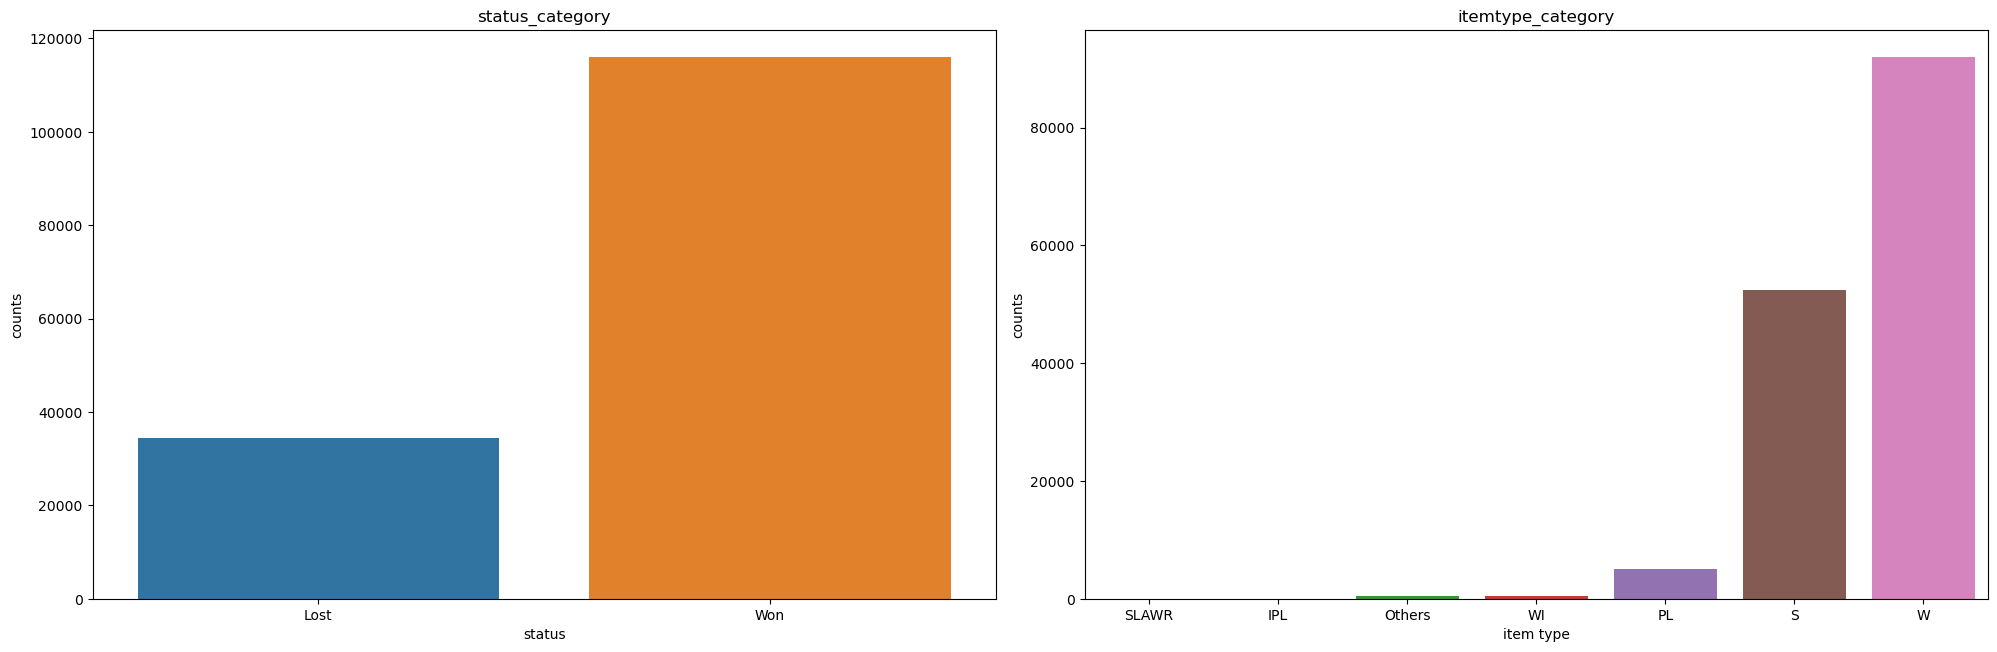

In [33]:
plt.figure(figsize=(30,25))
plt.subplot(431)
sns.countplot(df['status'],order=df['status'].value_counts().index[::-1])
plt.xlabel('status')
plt.ylabel('counts')
plt.title('status_category')

plt.subplot(432)
sns.countplot(df['item type'],order=df['item type'].value_counts().index[::-1])
plt.xlabel('item type')
plt.ylabel('counts')
plt.title('itemtype_category')

plt.tight_layout()

In [34]:
#orders for all the barplots in ascending order
customer_order = df.groupby('status')['customer'].mean().reset_index().sort_values('customer')['status']
country_order = df.groupby('status')['country'].mean().reset_index().sort_values('country')['status']
application_order = df.groupby('status')['application'].mean().reset_index().sort_values('application')['status']
thickness_order = df.groupby('status')['thickness'].mean().reset_index().sort_values('thickness')['status']
width_avail_order = df.groupby('status')['width'].mean().reset_index().sort_values('width')['status']
product_ref_order = df.groupby('status')['product_ref'].mean().reset_index().sort_values('product_ref')['status']

C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

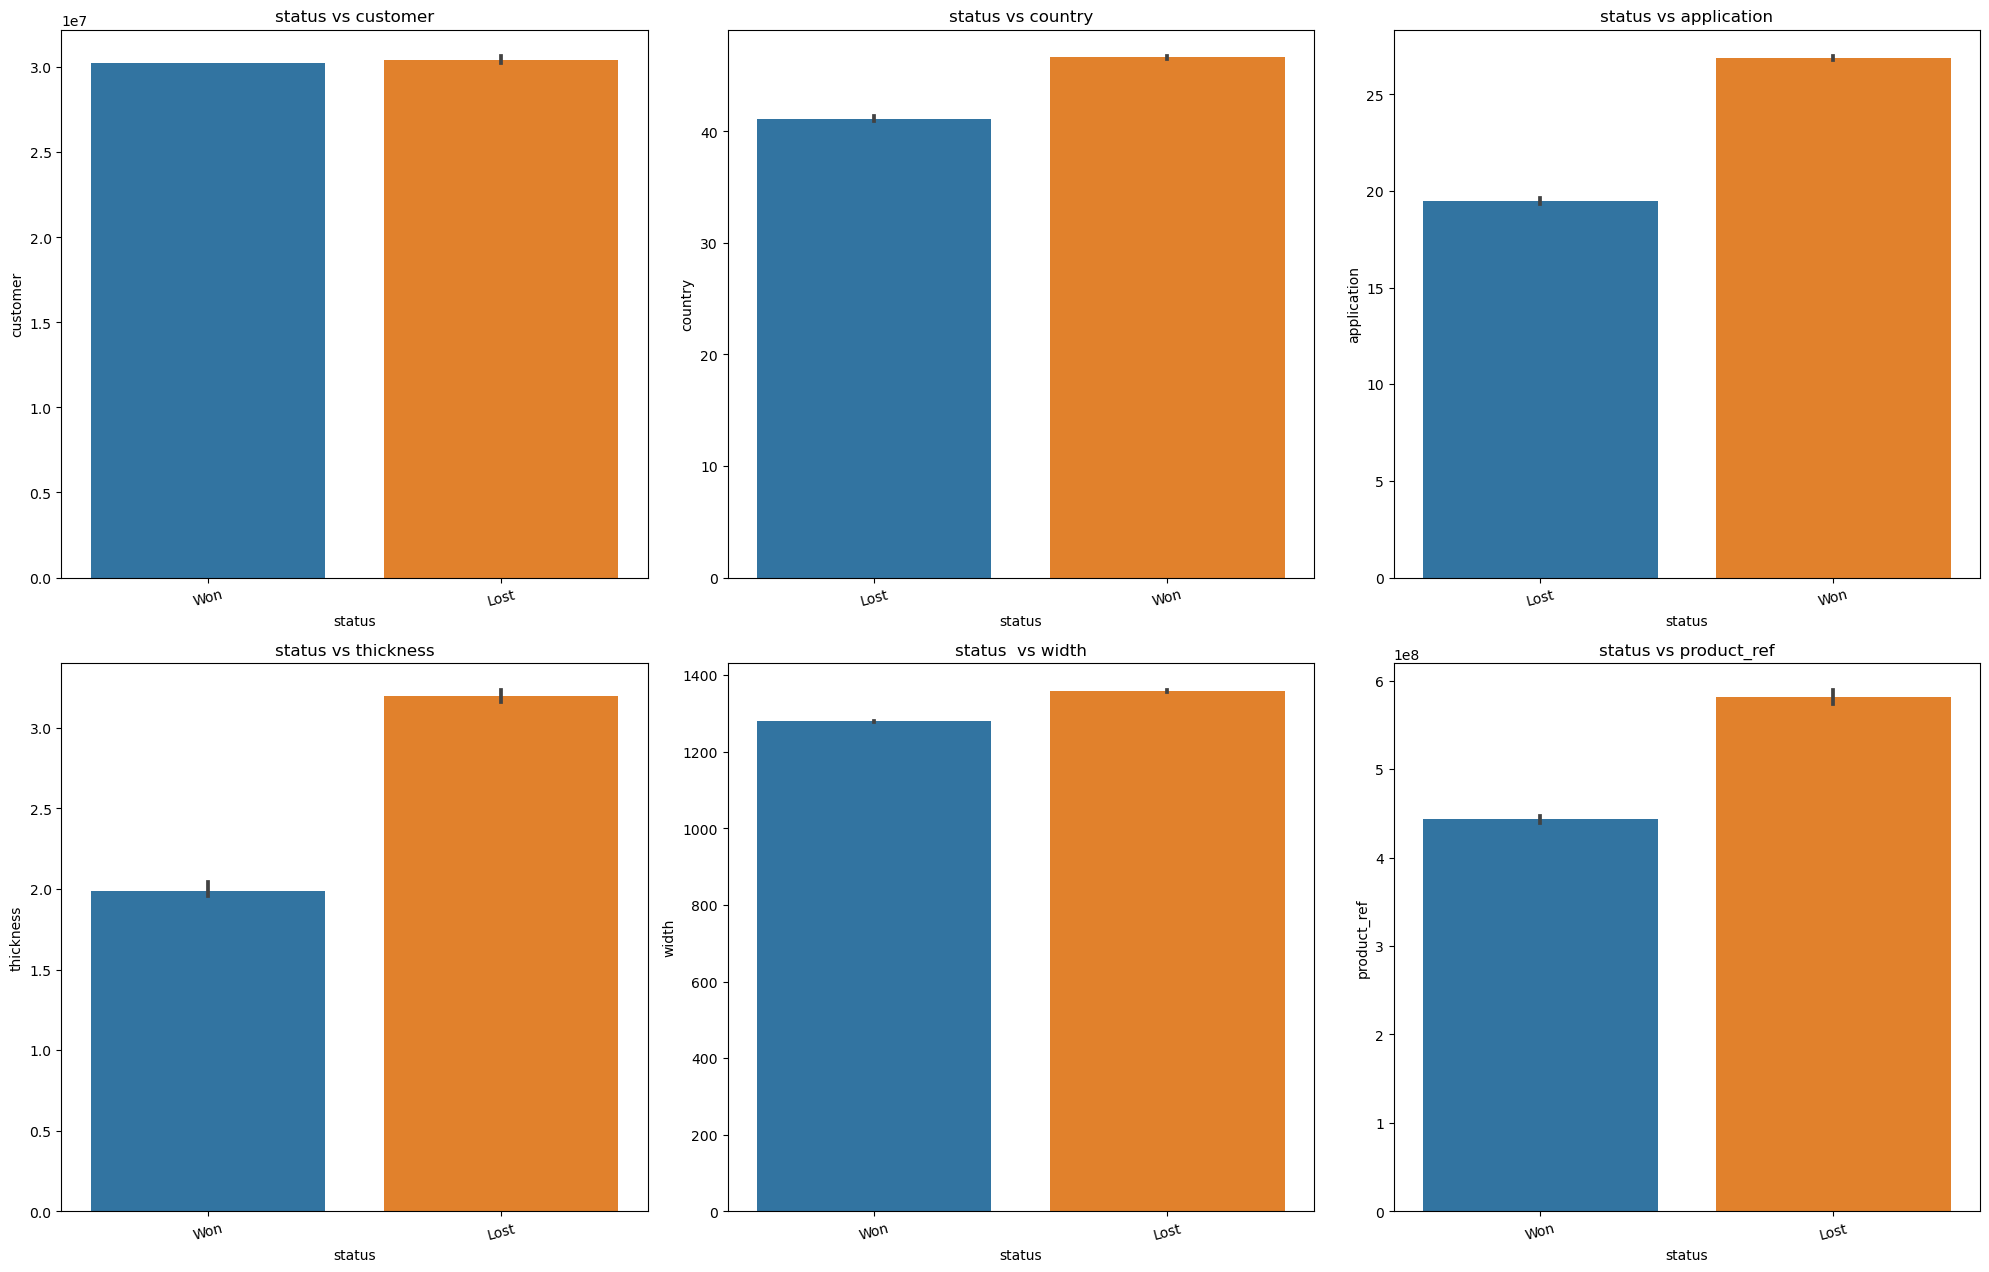

In [35]:
#for categorical columns
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(df['status'],df['customer'],order=customer_order)
plt.xticks(rotation=15)
plt.xlabel('status')
plt.ylabel('customer')
plt.title('status vs customer')

plt.subplot(432)
sns.barplot(df['status'],df['country'],order=country_order)
plt.xticks(rotation=15)
plt.xlabel('status')
plt.ylabel('country')
plt.title('status vs country')

plt.subplot(433)
sns.barplot(df['status'],df['application'],order=application_order)
plt.xticks(rotation=15)
plt.xlabel('status')
plt.ylabel('application')
plt.title('status vs application')

plt.subplot(434)
sns.barplot(df['status'],df['thickness'],order=thickness_order)
plt.xticks(rotation=15)
plt.xlabel('status')
plt.ylabel('thickness')
plt.title('status vs thickness')

plt.subplot(435)
sns.barplot(df['status'],df['width'],order=width_avail_order)
plt.xticks(rotation=15)
plt.xlabel('status')
plt.ylabel('width')
plt.title('status  vs width')

plt.subplot(436)
sns.barplot(df['status'],df['product_ref'],order=product_ref_order)
plt.xticks(rotation=15)
plt.xlabel('status')
plt.ylabel('product_ref')
plt.title('status vs product_ref')


plt.tight_layout()

C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Windows 11\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\User

Text(0.5, 1.0, 'product_ref_status')

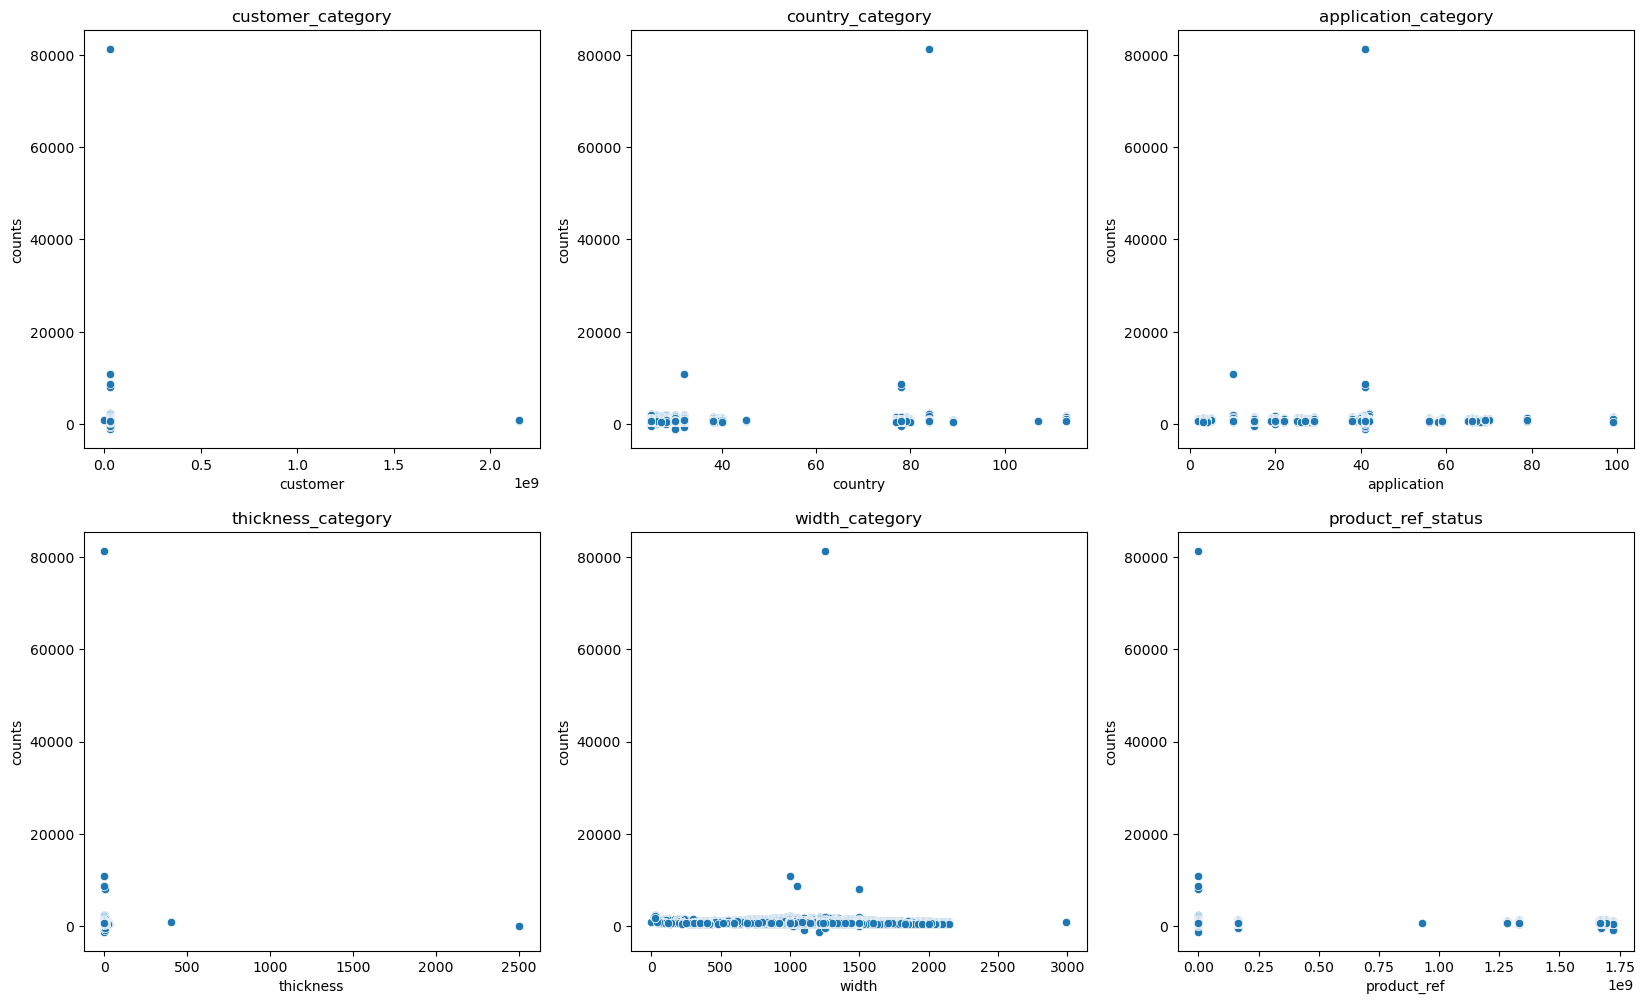

In [36]:
plt.figure(figsize=(20,25))
plt.subplot(431)
sns.scatterplot(df['customer'],df['selling_price'])
plt.xlabel('customer')
plt.ylabel('counts')
plt.title('customer_category')

plt.subplot(432)
sns.scatterplot(df['country'],df['selling_price'])
plt.xlabel('country')
plt.ylabel('counts')
plt.title('country_category')


plt.subplot(433)
sns.scatterplot(df['application'],df['selling_price'])
plt.xlabel('application')
plt.ylabel('counts')
plt.title('application_category')


plt.subplot(434)
sns.scatterplot(df['thickness'],df['selling_price'])
plt.xlabel('thickness')
plt.ylabel('counts')
plt.title('thickness_category')



plt.subplot(435)
sns.scatterplot(df['width'],df['selling_price'])
plt.xlabel('width')
plt.ylabel('counts')
plt.title('width_category')



plt.subplot(436)
sns.scatterplot(df['product_ref'],df['selling_price'])
plt.xlabel('product_ref')
plt.ylabel('counts')
plt.title('product_ref_status')



# PREPROCESSING -
## ENCODING :

In [37]:
df['item type']=df['item type'].map({'W':0,'S':1,'PL':2,'WI':3,'Others':4,'IPL':5,'SLAWR':6})
df['status']=df['status'].map({'Won':0,'Lost':1})

In [38]:
df

,item_date,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,1970-01-01 00:00:00.020210401,30156308,28,0,0,10,2,1500,1670798778,1970-01-01 00:00:00.020210701,854
1,1970-01-01 00:00:00.020210401,30202938,25,0,0,41,0,1210,1668701718,1970-01-01 00:00:00.020210401,1047
2,1970-01-01 00:00:00.020210401,30153963,30,0,3,28,0,952,628377,1970-01-01 00:00:00.020210101,644
3,1970-01-01 00:00:00.020210401,30349574,32,0,1,59,2,1317,1668701718,1970-01-01 00:00:00.020210101,768
4,1970-01-01 00:00:00.020210401,30211560,28,0,0,10,4,2000,640665,1970-01-01 00:00:00.020210301,577
...,...,...,...,...,...,...,...,...,...,...,...
150443,1970-01-01 00:00:00.020200702,30200854,25,0,0,41,0,1220,164141591,1970-01-01 00:00:00.020200701,591
150444,1970-01-01 00:00:00.020200702,30200854,25,0,0,41,0,1500,164141591,1970-01-01 00:00:00.020200701,589
150445,1970-01-01 00:00:00.020200702,30200854,25,0,0,41,0,1250,164141591,1970-01-01 00:00:00.020200701,619
150446,1970-01-01 00:00:00.020200702,30200854,25,0,0,41,0,1250,164141591,1970-01-01 00:00:00.020200701,601


In [39]:
df

,item_date,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,1970-01-01 00:00:00.020210401,30156308,28,0,0,10,2,1500,1670798778,1970-01-01 00:00:00.020210701,854
1,1970-01-01 00:00:00.020210401,30202938,25,0,0,41,0,1210,1668701718,1970-01-01 00:00:00.020210401,1047
2,1970-01-01 00:00:00.020210401,30153963,30,0,3,28,0,952,628377,1970-01-01 00:00:00.020210101,644
3,1970-01-01 00:00:00.020210401,30349574,32,0,1,59,2,1317,1668701718,1970-01-01 00:00:00.020210101,768
4,1970-01-01 00:00:00.020210401,30211560,28,0,0,10,4,2000,640665,1970-01-01 00:00:00.020210301,577
...,...,...,...,...,...,...,...,...,...,...,...
150443,1970-01-01 00:00:00.020200702,30200854,25,0,0,41,0,1220,164141591,1970-01-01 00:00:00.020200701,591
150444,1970-01-01 00:00:00.020200702,30200854,25,0,0,41,0,1500,164141591,1970-01-01 00:00:00.020200701,589
150445,1970-01-01 00:00:00.020200702,30200854,25,0,0,41,0,1250,164141591,1970-01-01 00:00:00.020200701,619
150446,1970-01-01 00:00:00.020200702,30200854,25,0,0,41,0,1250,164141591,1970-01-01 00:00:00.020200701,601


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150448 entries, 0 to 150447
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      150448 non-null  datetime64[ns]
 1   customer       150448 non-null  int32         
 2   country        150448 non-null  int32         
 3   status         150448 non-null  int64         
 4   item type      150448 non-null  int64         
 5   application    150448 non-null  int32         
 6   thickness      150448 non-null  int32         
 7   width          150448 non-null  int32         
 8   product_ref    150448 non-null  int64         
 9   delivery date  150448 non-null  datetime64[ns]
 10  selling_price  150448 non-null  int32         
dtypes: datetime64[ns](2), int32(6), int64(3)
memory usage: 10.3 MB


# SPLITTING For CLASSIFIER ALGORITHMS:

In [41]:
x=df.drop(columns=['status','selling_price','item_date','delivery date'])
y=df['status']

In [42]:
x

,customer,country,item type,application,thickness,width,product_ref
0,30156308,28,0,10,2,1500,1670798778
1,30202938,25,0,41,0,1210,1668701718
2,30153963,30,3,28,0,952,628377
3,30349574,32,1,59,2,1317,1668701718
4,30211560,28,0,10,4,2000,640665
...,...,...,...,...,...,...,...
150443,30200854,25,0,41,0,1220,164141591
150444,30200854,25,0,41,0,1500,164141591
150445,30200854,25,0,41,0,1250,164141591
150446,30200854,25,0,41,0,1250,164141591


In [43]:
y

0         0
1         0
2         0
3         0
4         0
         ..
150443    0
150444    0
150445    0
150446    0
150447    0
Name: status, Length: 150448, dtype: int64

In [44]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=70)

# SCALING :

In [45]:
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.transform(xtest)

# MACHINE LEARNING MODEL SELECTION -
## KNeighborsClassifier :

In [46]:
kvalue=np.arange(1,20)
kcrossval=[]
for k in kvalue:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain,ytrain)
    print('kvalue',k,'trainscore',knn.score(xtrain,ytrain),'crosscore',cross_val_score(knn,xtrain,ytrain,cv=10).mean())
    kcrossval.append(cross_val_score(knn,xtrain,ytrain,cv=10).mean())

kvalue 1 trainscore 0.8964755147144353 crosscore 0.8408331659225343
kvalue 2 trainscore 0.889878529054986 crosscore 0.8494574233261993
kvalue 3 trainscore 0.8910417255188687 crosscore 0.8453031571398532
kvalue 4 trainscore 0.883863141627478 crosscore 0.8497066983511452
kvalue 5 trainscore 0.8835972681500192 crosscore 0.8489091146447102
kvalue 6 trainscore 0.8765017697203343 crosscore 0.8485518358371775
kvalue 7 trainscore 0.8755878296415693 crosscore 0.8460426365274761
kvalue 8 trainscore 0.8717409727645856 crosscore 0.846482983537961
kvalue 9 trainscore 0.8713587796407385 crosscore 0.8456687519493865
kvalue 10 trainscore 0.8671878894631018 crosscore 0.8441233652594355
kvalue 11 trainscore 0.8661493211917779 crosscore 0.8427939978706727
kvalue 12 trainscore 0.8634656607786769 crosscore 0.8418634430457417
kvalue 13 trainscore 0.8626597318001296 crosscore 0.8405008213139282
kvalue 14 trainscore 0.8595107928014756 crosscore 0.8401020163439885
kvalue 15 trainscore 0.8586965552767577 crossc

In [47]:
max(kcrossval)

0.8497066983511452

# IMPLEMENTING KNeighborsClassifier :

In [48]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=4)

In [49]:
knn1=knn.predict(xtest)

In [50]:
knn1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
knncm=confusion_matrix(ytest,knn1)
knncm

array([[22188,  1037],
       [ 3371,  3494]], dtype=int64)

In [52]:
knnas=accuracy_score(ytest,knn1)
knnas

0.8535061482220007

In [53]:
knn.score(xtest,ytest)

0.8535061482220007

In [168]:
knnauc=roc_auc_score(ytest,knn1)
knnauc

0.7321541618026259

In [54]:
knnrs=recall_score(ytest,knn1)
knnrs

0.5089584850691915

In [55]:
knnps=precision_score(ytest,knn1)
knnps

0.7711322003972633

In [181]:
kcrossvalue=cross_val_score(knn,xtrain,ytrain,cv=10).mean()

In [182]:
kcrossvalue

0.8497066983511452

In [58]:
f1kcrossvalscore=cross_val_score(knn,xtrain,ytrain,cv=10,scoring='f1').mean()

In [59]:
f1kcrossvalscore

0.6042272149828671

# DecisionTreeClassifier :

In [60]:
dvalue=np.arange(1,10)
dcrossvalue=[]
for m in dvalue:
    d=DecisionTreeClassifier(max_depth=m,random_state=35)
    d.fit(xtrain,ytrain)
    print(f'dvalue"{m}" train score"{d.score(xtrain,ytrain)}"crossval"{cross_val_score(d,xtrain,ytrain,cv=10).mean()}"')
    dcrossvalue.append(cross_val_score(d,xtrain,ytrain,cv=10).mean())

dvalue"1" train score"0.7709084564382924"crossval"0.770908456599458"
dvalue"2" train score"0.7709084564382924"crossval"0.770908456599458"
dvalue"3" train score"0.7709084564382924"crossval"0.770908456599458"
dvalue"4" train score"0.7962162880739129"crossval"0.796116589298715"
dvalue"5" train score"0.8148772827730604"crossval"0.8147111055698713"
dvalue"6" train score"0.8222968145033982"crossval"0.8215157939835113"
dvalue"7" train score"0.8367204506555443"crossval"0.8352664254846595"
dvalue"8" train score"0.8419049834659931"crossval"0.8401269305226544"
dvalue"9" train score"0.8507702022300138"crossval"0.8472307575266169"


In [61]:
max(dcrossvalue)

0.8472307575266169

# IMPLEMENTING DecisionTreeClassifier :

In [62]:
d=DecisionTreeClassifier(max_depth=9,random_state=35)
d.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=9, random_state=35)

In [63]:
d1=d.predict(xtest)

In [64]:
d1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [65]:
dcm=confusion_matrix(ytest,d1)
dcm

array([[22077,  1148],
       [ 3440,  3425]], dtype=int64)

In [66]:
das=accuracy_score(ytest,d1)
das

0.8475240943835162

In [67]:
d.score(xtest,ytest)

0.8475240943835162

In [169]:
dauc=roc_auc_score(ytest,d1)
dauc

0.7247390038705873

In [68]:
drs=recall_score(ytest,d1)
drs

0.4989075018208303

In [69]:
dps=precision_score(ytest,d1)
dps

0.7489612945549967

In [184]:
dcrossvalue= cross_val_score(d,xtrain,ytrain,cv=10).mean()

In [185]:
dcrossvalue

0.8472307575266169

In [72]:
f1dcrossvalscore= cross_val_score(d,xtrain,ytrain,cv=10,scoring='f1').mean()

In [73]:
f1dcrossvalscore

0.5993584798093496

# RandomForestClassifier :

In [74]:
rscore=np.array([1,4,7,9,12,17,19,26,30])
rcrossval=[]
for md in rscore:
    r=RandomForestClassifier(max_depth=md,random_state=35)
    r.fit(xtrain,ytrain)
    print('mdvalue',md,'train score',r.score(xtrain,ytrain),'crossval',cross_val_score(r,xtrain,ytrain,cv=10).mean())
    rcrossval.append(cross_val_score(r,xtrain,ytrain,cv=10).mean())

mdvalue 1 train score 0.7709084564382924 crossval 0.770908456599458
mdvalue 4 train score 0.7905083168547168 crossval 0.7907409677904383
mdvalue 7 train score 0.8269911430897822 crossval 0.82648432765683
mdvalue 9 train score 0.8450954651955 crossval 0.8423204027303216
mdvalue 12 train score 0.8717326642184151 crossval 0.8627760369355858
mdvalue 17 train score 0.9092872929094867 crossval 0.8807141682555161
mdvalue 19 train score 0.9165905049934362 crossval 0.8813290028819509
mdvalue 26 train score 0.9231459479220326 crossval 0.8785705582325175
mdvalue 30 train score 0.9231957991990561 crossval 0.8786120975116474


In [75]:
max(rcrossval)

0.8813290028819509

# IMPLEMENTING RandomForestClassifier :

In [76]:
r=RandomForestClassifier(max_depth=19,random_state=35)
r.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=19, random_state=35)

In [77]:
r1=r.predict(xtest)

In [78]:
r1

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [79]:
rcm=confusion_matrix(ytest,r1)
rcm

array([[22102,  1123],
       [ 2328,  4537]], dtype=int64)

In [80]:
ras=accuracy_score(ytest,r1)
ras

0.8853107344632768

In [81]:
r.score(xtest,ytest)

0.8853107344632768

In [170]:
rauc=roc_auc_score(ytest,r1)
rauc

0.806267748685435

In [82]:
rrs=recall_score(ytest,r1)
rrs

0.6608885651857247

In [83]:
rps=precision_score(ytest,r1)
rps

0.8015901060070671

In [84]:
rcrossvalue=cross_val_score(r,xtrain,ytrain,cv=10).mean()

In [85]:
rcrossvalue

0.8813290028819509

In [86]:
f1rcrossvalue=cross_val_score(r,xtrain,ytrain,cv=10,scoring='f1').mean()

In [87]:
f1rcrossvalue

0.7154542502131604

# XGBClassifier :

In [88]:
lrvalue=np.array([0.1,0.5,0.7,0.9])
xcrossvalscore=[]
for lr in lrvalue:
    x=xgb.XGBClassifier(learning_rate=lr,n_estimators=323)
    x.fit(xtrain,ytrain)
    print(f'lrvalue"{lr}"train score"{x.score(xtrain,ytrain)}crosssval score"{cross_val_score(x,xtrain,ytrain,cv=12).mean()}"')
    xcrossvalscore.append(cross_val_score(x,xtrain,ytrain,cv=12).mean())

lrvalue"0.1"train score"0.8799913591119826crosssval score"0.872571793377802"
lrvalue"0.5"train score"0.9047342096080028crosssval score"0.880764022122485"
lrvalue"0.7"train score"0.9088220143239336crosssval score"0.8800910253253268"
lrvalue"0.9"train score"0.9108825337742402crosssval score"0.8788031955584041"


In [89]:
max(xcrossvalscore)

0.880764022122485

# IMPLEMENTING XGBClassifier :

In [90]:
x=xgb.XGBClassifier(learning_rate=0.5,n_estimators=323)
x.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=323, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [91]:
x1=x.predict(xtest)

In [92]:
x1

array([0, 0, 1, ..., 0, 0, 0])

In [93]:
xcm=confusion_matrix(ytest,x1)
xcm

array([[21996,  1229],
       [ 2274,  4591]], dtype=int64)

In [94]:
xas=accuracy_score(ytest,x1)
xas

0.8835825855766035

In [95]:
x.score(xtest,ytest)

0.8835825855766035

In [171]:
xauc=roc_auc_score(ytest,x1)
xauc

0.807918718449068

In [96]:
xrs=recall_score(ytest,x1)
xrs

0.6687545520757465

In [97]:
xps=precision_score(ytest,x1)
xps

0.7888316151202749

In [98]:
xcrossvalscore=cross_val_score(x,xtrain,ytrain,cv=12).mean()

In [99]:
xcrossvalscore

0.880764022122485

In [100]:
f1xcrossvalscore=cross_val_score(x,xtrain,ytrain,cv=12,scoring='f1').mean()

In [101]:
f1xcrossvalscore

0.7169511913262783

# SPLITTING For REGRESSION ALGORITHMS:

In [102]:
xx=df.drop(columns=['status','selling_price','item_date','delivery date'])
yy=df['selling_price']

In [103]:
xx

,customer,country,item type,application,thickness,width,product_ref
0,30156308,28,0,10,2,1500,1670798778
1,30202938,25,0,41,0,1210,1668701718
2,30153963,30,3,28,0,952,628377
3,30349574,32,1,59,2,1317,1668701718
4,30211560,28,0,10,4,2000,640665
...,...,...,...,...,...,...,...
150443,30200854,25,0,41,0,1220,164141591
150444,30200854,25,0,41,0,1500,164141591
150445,30200854,25,0,41,0,1250,164141591
150446,30200854,25,0,41,0,1250,164141591


In [104]:
yy

0          854
1         1047
2          644
3          768
4          577
          ... 
150443     591
150444     589
150445     619
150446     601
150447     607
Name: selling_price, Length: 150448, dtype: int32

In [105]:
xxtrain,xxtest,yytrain,yytest = train_test_split(xx,yy,test_size=0.2,random_state=70)

# MACHINE LEARNING MODEL SELECTION -
## LINEAR REGRESSION :

In [106]:
lr=LinearRegression()

In [107]:
lr.fit(xxtrain,yytrain)

LinearRegression()

In [108]:
lr1=lr.predict(xxtest)

In [109]:
lr1

array([876.60694102, 894.79341469, 809.33601479, ..., 849.54786922,
       903.31194112, 878.3406284 ])

In [110]:
lr2score=r2_score(yytest,lr1)

In [111]:
lr2score

0.08286832558286206

In [112]:
lmse=mean_squared_error(yytest,lr1)

In [113]:
lmse

37567.52097563617

In [114]:
lrcrossvalscore=cross_val_score(lr,xxtrain,yytrain,cv=10).mean()

In [115]:
lrcrossvalscore

-0.2639219141445252

In [116]:
lr.score(xxtest,yytest)

0.08286832558286206

# SCALING :

In [117]:
ss=StandardScaler()
xxtrain=ss.fit_transform(xxtrain)
xxtest=ss.transform(xxtest)

# KNeighborsRegressor : 

In [118]:
kvalue=np.arange(1,20)
kcrossvalscore=[]
for k in kvalue:
    knnr=KNeighborsRegressor(n_neighbors=k)
    knnr.fit(xxtrain,yytrain)
    print('kvalue',k,'train score',knnr.score(xxtrain,yytrain),'crossscore :',cross_val_score(knnr,xxtrain,yytrain,cv=10).mean())
    kcrossvalscore.append(cross_val_score(knnr,xxtrain,yytrain,cv=10).mean())

kvalue 1 train score 0.1764617768434138 crossscore : 0.18073701209566723
kvalue 2 train score 0.23826722501975817 crossscore : 0.3347677303988956
kvalue 3 train score 0.2487092203317629 crossscore : 0.37564721554444547
kvalue 4 train score 0.24981191225703403 crossscore : 0.39427874292906123
kvalue 5 train score 0.24886642698305006 crossscore : 0.40240457229079213
kvalue 6 train score 0.24678124162804216 crossscore : 0.4082200540558346
kvalue 7 train score 0.24440792208323459 crossscore : 0.4106868939784379
kvalue 8 train score 0.24202344243423335 crossscore : 0.4119592259727741
kvalue 9 train score 0.23980900961928864 crossscore : 0.4124262556944486
kvalue 10 train score 0.23772925091348052 crossscore : 0.4130159334288231
kvalue 11 train score 0.2353833429634048 crossscore : 0.41298893902378
kvalue 12 train score 0.2328207925455381 crossscore : 0.41225749667966466
kvalue 13 train score 0.23054907900404098 crossscore : 0.410263764639739
kvalue 14 train score 0.22802454966633523 crosssc

In [119]:
max(kcrossvalscore)

0.4130159334288231

# IMPLEMENTING KNeighborsRegressor :

In [120]:
knnr=KNeighborsRegressor(n_neighbors=10)
knnr.fit(xxtrain,yytrain)

KNeighborsRegressor(n_neighbors=10)

In [121]:
knnr1=knnr.predict(xxtest)

In [122]:
knnr2score=r2_score(yytest,knnr1)

In [123]:
knnr2score

0.464971216780835

In [124]:
knnmse=mean_squared_error(yytest,knnr1)

In [125]:
knnmse

21915.833458624125

In [126]:
knnr.score(xxtest,yytest)

0.464971216780835

In [127]:
knnrcrossvalscore=cross_val_score(knnr,xxtrain,yytrain,cv=10).mean()

In [128]:
knnrcrossvalscore

0.4130159334288231

# DecisionTreeRegressor :

In [129]:
dvalue=np.arange(1,10)
dcrossvalscore=[]
for m in dvalue:
    dr=DecisionTreeRegressor(max_depth=m,random_state=54)
    dr.fit(xxtrain,yytrain)
    print(f'dval:"{m}" for train score :"{dr.score(xxtrain,yytrain)}"crossvalscore :"{cross_val_score(dr,xxtrain,yytrain,cv=10).mean()}"')
    dcrossvalscore.append(cross_val_score(dr,xxtrain,yytrain,cv=10).mean())

dval:"1" for train score :"0.13199851133691443"crossvalscore :"0.2681314024192728"
dval:"2" for train score :"0.14952060974469605"crossvalscore :"0.2991502706281698"
dval:"3" for train score :"0.16341460622369786"crossvalscore :"0.32606128526351646"
dval:"4" for train score :"0.17246309977724084"crossvalscore :"0.3417035411204985"
dval:"5" for train score :"0.1813737236452141"crossvalscore :"0.3536637854883572"
dval:"6" for train score :"0.1913019049291762"crossvalscore :"0.35655299488809983"
dval:"7" for train score :"0.20222645377322135"crossvalscore :"0.3682215540208678"
dval:"8" for train score :"0.21487732070855592"crossvalscore :"0.3793913131347392"
dval:"9" for train score :"0.2240351512076455"crossvalscore :"0.3966881730097441"


In [130]:
max(dcrossvalscore)

0.3966881730097441

# IMPLEMENTING DecisionTreeRegressor :

In [131]:
dr=DecisionTreeRegressor(max_depth=9,random_state=54)
dr.fit(xxtrain,yytrain)

DecisionTreeRegressor(max_depth=9, random_state=54)

In [132]:
dr1=dr.predict(xxtest)

In [133]:
dr2score=r2_score(yytest,dr1)

In [134]:
dr2score

0.4507897178796001

In [135]:
dmse=mean_squared_error(yytest,dr1)

In [136]:
dmse

22496.735604193018

In [137]:
dr.score(xxtest,yytest)

0.4507897178796001

In [138]:
drcrossvalscore=cross_val_score(dr,xxtrain,yytrain,cv=10).mean()

In [139]:
drcrossvalscore

0.3966881730097441

# RandomForestRegressor :

In [140]:
rvalue=np.array([1,2,3,6,8,12,15,29,30])
rcrossval=[]
for mm in rvalue:
    rr=RandomForestRegressor(max_depth=mm,random_state=5325)
    rr.fit(xxtrain,yytrain)
    print('rvalue',mm,'trainvale',rr.score(xxtrain,yytrain),'crossvalscore',cross_val_score(rr,xxtrain,yytrain,cv=10).mean())
    rcrossval.append(cross_val_score(rr,xxtrain,yytrain,cv=10).mean())

rvalue 1 trainvale 0.13199835359657697 crossvalscore 0.26814287876015336
rvalue 2 trainvale 0.14960375260138903 crossvalscore 0.2996511334875859
rvalue 3 trainvale 0.16486431731747975 crossvalscore 0.3292201287710106
rvalue 6 trainvale 0.19890485312771722 crossvalscore 0.36683274443591396
rvalue 8 trainvale 0.22102912691360765 crossvalscore 0.4000238685255836
rvalue 12 trainvale 0.26102078227209147 crossvalscore 0.46495260324467347
rvalue 15 trainvale 0.28368221921123205 crossvalscore 0.487135866553269
rvalue 29 trainvale 0.3062967643846538 crossvalscore 0.4685842749942807
rvalue 30 trainvale 0.30634179612933665 crossvalscore 0.46817722725525907


In [141]:
max(rcrossval)

0.487135866553269

# IMPLEMENTING RandomForestRegressor :

In [142]:
rr=RandomForestRegressor(max_depth=15,random_state=5325)
rr.fit(xxtrain,yytrain)

RandomForestRegressor(max_depth=15, random_state=5325)

In [143]:
rr1=rr.predict(xxtest)

In [144]:
rr2score=r2_score(yytest,rr1)

In [145]:
rr2score

0.5491046684784044

In [146]:
rmse=mean_squared_error(yytest,rr1)

In [147]:
rmse

18469.561456940384

In [148]:
rr.score(xxtest,yytest)

0.5491046684784044

In [149]:
rrcrossvalscore=cross_val_score(rr,xxtrain,yytrain,cv=10).mean()

In [150]:
rrcrossvalscore

0.487135866553269

# xgboost - XGBRegressor :

In [152]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [153]:
import xgboost as xgb

In [155]:
lrvalue=np.array([0.1,0.5,0.7,0.9])
crossval=[]
for lr in lrvalue:
                 xr=xgb.XGBRegressor(learning_rate=lr,n_estimators=100)
                 xr.fit(xxtrain,yytrain)
                 print('lrvalue:',lr,'train score:',xr.score(xxtrain,yytrain),'crossvalscore:',cross_val_score(xr,xxtrain,yytrain,cv=10).mean())
                 crossval.append(cross_val_score(xr,xxtrain,yytrain,cv=10).mean())

lrvalue: 0.1 train score: 0.24163284725201872 crossvalscore: 0.45014836739329456
lrvalue: 0.5 train score: 0.268408960078131 crossvalscore: 0.4752644631803585
lrvalue: 0.7 train score: 0.27270808891746057 crossvalscore: 0.4728660978331991
lrvalue: 0.9 train score: 0.27491325371658737 crossvalscore: 0.46939286114222745


In [156]:
max(crossval)

0.4752644631803585

# IMPLEMENTING xgboost - XGBRegressor :

In [157]:
xr=xgb.XGBRegressor(learning_rate=0.5,n_estimators=100)
xr.fit(xxtrain,yytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [158]:
xr1=xr.predict(xxtest)

In [159]:
xr2score=r2_score(yytest,xr1)

In [160]:
xr2score

0.5369168742201827

In [161]:
xmse=mean_squared_error(yytest,xr1)

In [162]:
xmse

18968.797530902684

In [163]:
xr.score(xxtest,yytest)

0.5369168742201827

In [166]:
xrcrossvalscore=cross_val_score(xr,xxtrain,yytrain,cv=10).mean()

In [167]:
xrcrossvalscore

0.4752644631803585

# EVALUATION METRIC FOR CLASSIFIER ALGORITHM :

# RE-CALL VALUE  OF MACHINE LEARNING MODELS :

In [172]:
print("Re-Call Value for K-Nearest Neighbors Classifier Model:",knnrs)
print("Re-Call Value for Decision Tree Classifier Model: ",drs)
print("Re-Calln Value for Random Forest Classifier Model: ",rrs)
print("Re-Call Value for Extreme-Gradient Boosting Classifier Model: ",xrs)

Re-Call Value for K-Nearest Neighbors Classifier Model: 0.5089584850691915
Re-Call Value for Decision Tree Classifier Model:  0.4989075018208303
Re-Calln Value for Random Forest Classifier Model:  0.6608885651857247
Re-Call Value for Extreme-Gradient Boosting Classifier Model:  0.6687545520757465


# AUC VALUE  OF MACHINE LEARNING MODELS :

In [173]:
print("AUC Score for K-Nearest Neighbors Classifier Model:",knnauc)
print("AUC Score for Decision Tree Classifier Model: ",dauc)
print("AUC Score for Random Forest Classifier Model: ",rauc)
print("AUC Score for Extreme-Gradient Boosting Classifier Model: ",xauc)

AUC Score for K-Nearest Neighbors Classifier Model: 0.7321541618026259
AUC Score for Decision Tree Classifier Model:  0.7247390038705873
AUC Score for Random Forest Classifier Model:  0.806267748685435
AUC Score for Extreme-Gradient Boosting Classifier Model:  0.807918718449068


# PRECISION VALUE  OF MACHINE LEARNING MODELS :

In [174]:
print("Precision Value Score for K-Nearest Neighbors Classifier Model:",knnps)
print("Precision Value Score for Decision Tree Classifier Model: ",dps)
print("Precision Value Score for Random Forest Classifier Model: ",rps)
print("Precision Value Score for Extreme-Gradient Boosting Classifier Model: ",xps)

Precision Value Score for K-Nearest Neighbors Classifier Model: 0.7711322003972633
Precision Value Score for Decision Tree Classifier Model:  0.7489612945549967
Precision Value Score for Random Forest Classifier Model:  0.8015901060070671
Precision Value Score for Extreme-Gradient Boosting Classifier Model:  0.7888316151202749


# CROSS VALUE SCORE OF MACHINE LEARNING MODELS :

In [186]:
print("Cross Validation Score for K-Nearest Neighbors Classifier Model:",kcrossvalue)
print("Cross Validation Score for Decision Tree Classifier Model: ",dcrossvalue)
print("Cross Validation Score for Random Forest Classifier Model: ",rcrossvalue)
print("Cross Validation Score for Extreme-Gradient Boosting Classifier Model: ",xcrossvalscore)

Cross Validation Score for K-Nearest Neighbors Classifier Model: 0.8497066983511452
Cross Validation Score for Decision Tree Classifier Model:  0.8472307575266169
Cross Validation Score for Random Forest Classifier Model:  0.8813290028819509
Cross Validation Score for Extreme-Gradient Boosting Classifier Model:  0.880764022122485


# ACCURACY SCORE OF MACHINE LEARNING MODELS :

In [176]:
print("Accuracy Score for K-Nearest Neighbors Classifier Model:",knnas)
print("Accuracy Score for Decision Tree Classifier Model: ",das)
print("Accuracy Score for Random Forest Classifier Model: ",ras)
print("Accuracy Score for Extreme-Gradient Boosting Classifier Model: ",xas)

Accuracy Score for K-Nearest Neighbors Classifier Model: 0.8535061482220007
Accuracy Score for Decision Tree Classifier Model:  0.8475240943835162
Accuracy Score for Random Forest Classifier Model:  0.8853107344632768
Accuracy Score for Extreme-Gradient Boosting Classifier Model:  0.8835825855766035


# EVALUATION METRIC FOR REGRESSION ALGORITHM :

# R2 SCORE FOR MACHINE LEARNING MODELS :

In [177]:
print('r2_score score for linear regressor :',lr2score)
print('r2_score score for knn regressor :',knnr2score)
print('r2_score score for Decision Tree regressor :',dr2score)
print('r2_score score for Random forest regressor :',rr2score)
print('r2_score score for ExtremeGradientBoosting regressor :',xr2score)

r2_score score for linear regressor : 0.08286832558286206
r2_score score for knn regressor : 0.464971216780835
r2_score score for Decision Tree regressor : 0.4507897178796001
r2_score score for Random forest regressor : 0.5491046684784044
r2_score score for ExtremeGradientBoosting regressor : 0.5369168742201827


# MSE  FOR MACHINE LEARNING MODELS : 

In [178]:
print('MSE_score score for linear regressor :',lmse)
print('MSE_score score for knn regressor :',knnmse)
print('MSE_score score for Decision Tree regressor :',dmse)
print('MSE_score score for Random forest regressor :',rmse)
print('MSE_score score for ExtremeGradientBoosting regressor :',xmse)

MSE_score score for linear regressor : 37567.52097563617
MSE_score score for knn regressor : 21915.833458624125
MSE_score score for Decision Tree regressor : 22496.735604193018
MSE_score score for Random forest regressor : 18469.561456940384
MSE_score score for ExtremeGradientBoosting regressor : 18968.797530902684


# CROSS VALUE SCORE OF MACHINE LEARNING MODELS :

In [179]:
print('Cross Validation Score for linear regressor :',lrcrossvalscore)
print('Cross Validation Score for knn regressor :',knnrcrossvalscore)
print('Cross Validation Score for Decision Tree regressor :',drcrossvalscore)
print('Cross Validation Scorer2_score score for Random forest regressor :',rrcrossvalscore)
print('Cross Validation Score for ExtremeGradientBoosting regressor :',xrcrossvalscore)

Cross Validation Score for linear regressor : -0.2639219141445252
Cross Validation Score for knn regressor : 0.4130159334288231
Cross Validation Score for Decision Tree regressor : 0.3966881730097441
Cross Validation Scorer2_score score for Random forest regressor : 0.487135866553269
Cross Validation Score for ExtremeGradientBoosting regressor : 0.4752644631803585


# The best model depending on the evaluation metric scores is found out to be the Extreme-Gradient Boosting Classifier in Classifier division.
## IMPORTANT FEATURES :

In [187]:
x.feature_importances_

array([0.08847454, 0.19742666, 0.4021373 , 0.1816068 , 0.03607508,
       0.02749687, 0.06678277], dtype=float32)

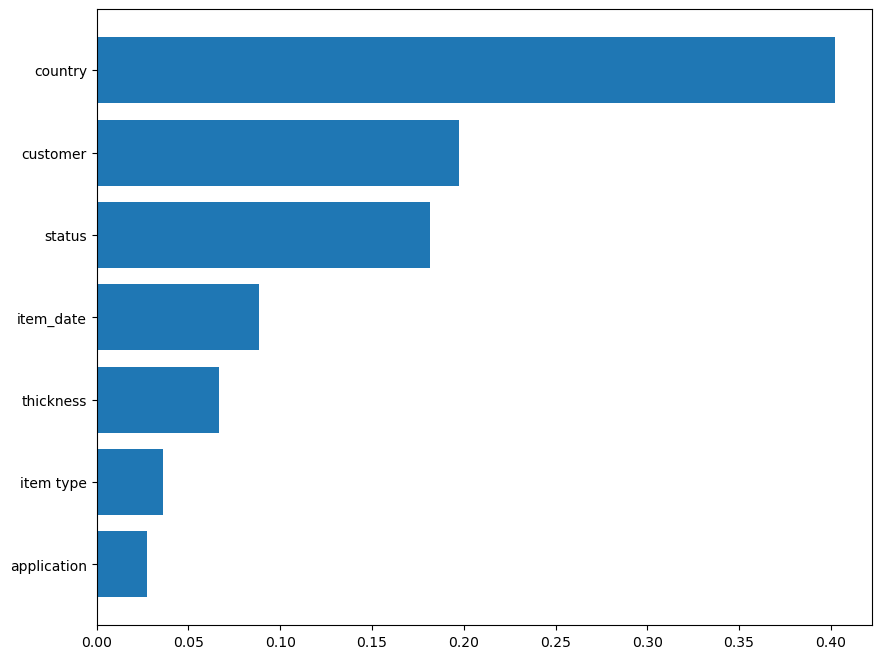

In [188]:
sorted_idx = x.feature_importances_.argsort()
plt.figure(figsize=(10,8))
plt.barh(df.columns[sorted_idx], x.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")
# plt.title("Feature Importance")
plt.show()

# Suggestions to Companies looking for People to undertake Insurance:

# Based on the feature importance given by Best Machine Learning Algorithm(Extreme-Gradient Boosting Classifier)-Companies who's looking for people for insurance undertaking should Focus on the features of order given below :

#### Previous Outcome 
##### Call type
##### Duration
##### Month
##### Day
###### Age
###### Marital
###### Jobs 
###### All other amenities equally affects accordingly

# The best model depending on the evaluation metric scores is found out to be the Random forest regressor in regressor division.

# IMPORTANT FEATURES :

In [191]:
rr.feature_importances_

array([0.15394279, 0.07726494, 0.02865527, 0.03285772, 0.03217868,
       0.11159803, 0.56350256])

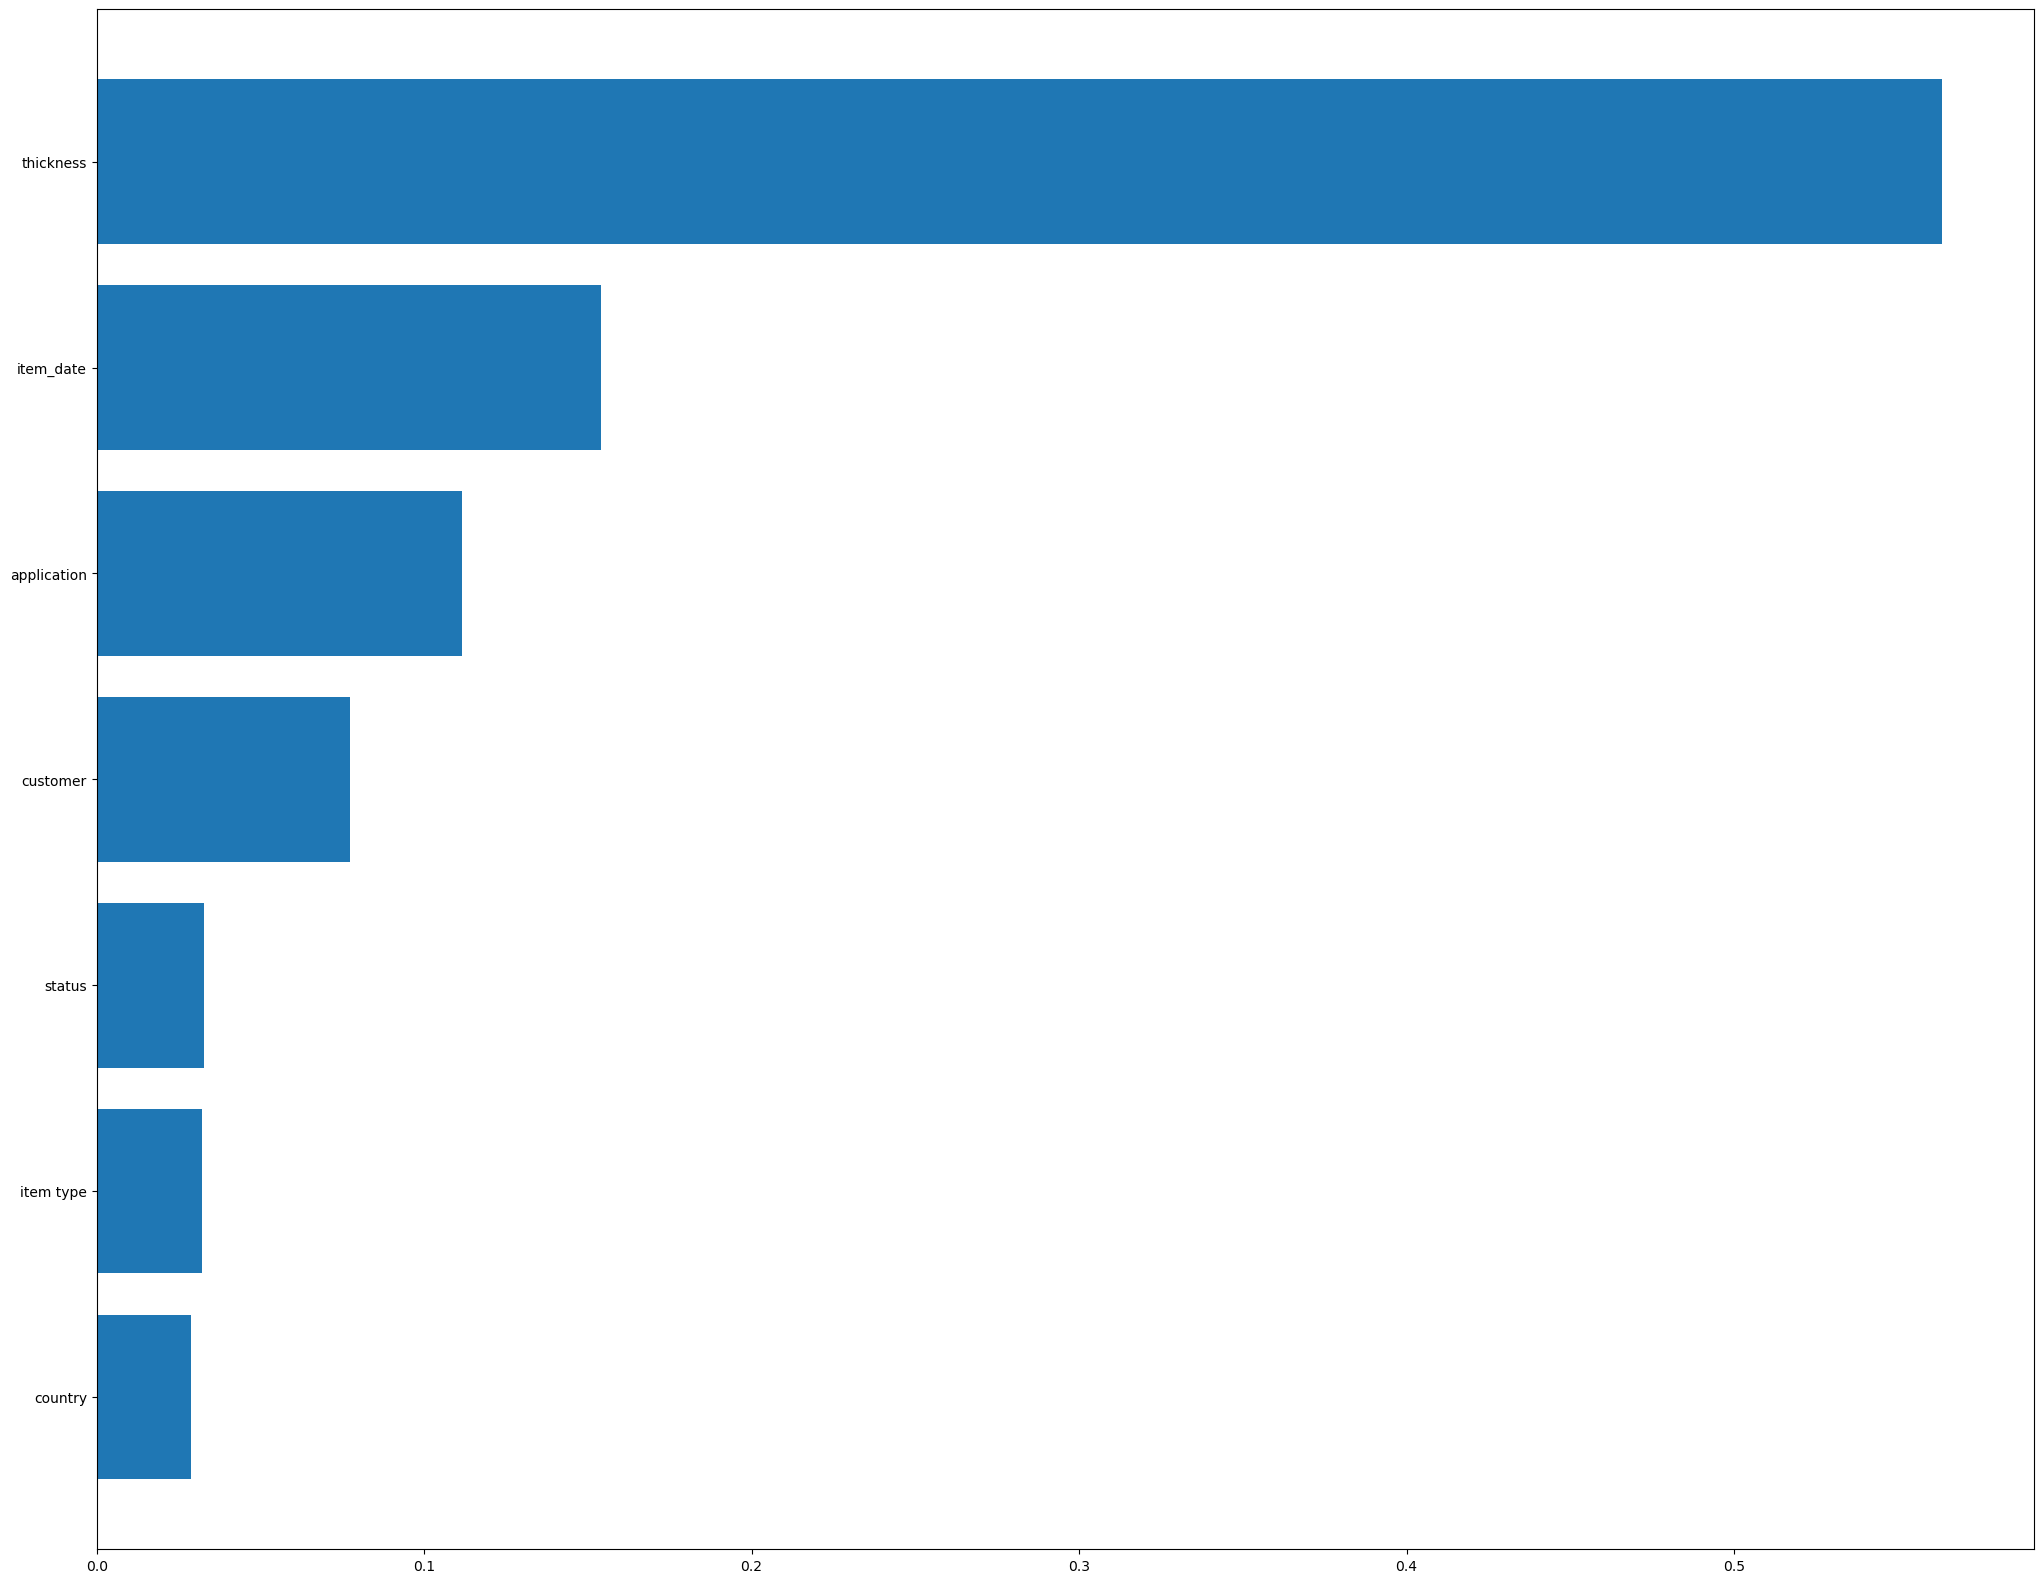

In [192]:
sorted_idx = rr.feature_importances_.argsort()
plt.figure(figsize=(25,20))
plt.barh(df.columns[sorted_idx], rr.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")
# plt.title("Feature Importance")
plt.show()

# Suggestions to Predict Chennai House Price:
## Based on the feature importance given by Best Machine Learning Algorithm(Extreme Gradient Boosting)-Person who's looking for Chennai house price value should Focus on the features of order given below to predict the Price value of the house :
### 1.Utility Availability
#### 2.Area
##### 3.No. of Bedrooms
###### 4.Date Sold
###### 5.Parking Facility
###### 6.Sq.ft Area
###### 7.No. of Bathrooms
###### All other amenities also equally affects the house prices. 